# Binary Classification with Logistic regression

## Import Libraries

In [120]:
# conecting inteface between python and mysql server database
import pymysql
# create engine is a callable within sqlalchemy
from sqlalchemy import create_engine
# it prompts the user and reads the user input as password
import getpass
#realworld data analysis package in python
import pandas as pd
# library used for working with arrays and also has many mathematical functions
import numpy as np
# data visualization library based on matplotlib
import seaborn as sns
# plotting library
import matplotlib.pyplot as plt
password= getpass.getpass()

········


## Connection to sql

In [121]:
# connection string
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine= create_engine(connection_string)

In [122]:
# Sql query to find the binary classification, here how likely the customer is good or bad
df=pd.read_sql_query('''
select l.loan_id, l.status, count(distinct t.trans_id) as nooftrans,
DATEDIFF(19981231, convert(a.date,date)) as ageindays, 
d.A12 as 95unemp, d.A13 as 96unemp, dp.type,
l.amount as loanamount, c.birth_number, d.A15 as crime95, d.A16 as crime96,
round((l.amount-l.payments)/l.amount,2) as ratiopaid
from loan l
left join trans t
using(account_id)
left join account a
using(account_id)
left join district d
on a.district_id = d.A1
left join disp dp
on a.account_id= dp.account_id 
left join client c
using(client_id)
where l.status in('A','B') and dp.type='OWNER'
group by loan_id, l.amount, status, d.A12, d.A13, c.birth_number, d.A15, d.A16, DATEDIFF(19981231, convert(a.date,date)),
 dp.type, round((l.amount-l.payments)/l.amount,2)
''', engine)

In [123]:
# viewing first few rows of the data and all the columns
df.head()

,loan_id,status,nooftrans,ageindays,95unemp,96unemp,type,loanamount,birth_number,crime95,crime96,ratiopaid
0,4959,A,374,2134,0.29,0.43,OWNER,80952,450204,85677,99107,0.96
1,4961,B,259,1364,1.51,2.07,OWNER,30276,395423,2299,2354,0.92
2,4962,A,225,886,4.09,4.72,OWNER,30276,620209,5623,5887,0.92
3,4973,A,295,1534,1.12,1.54,OWNER,165960,445613,1874,1913,0.96
4,4986,A,209,970,4.75,5.44,OWNER,102876,420128,18782,18347,0.92


## EDA Explotory data analysis get to know the data

In [125]:
# this gives the information about the data especially to know if null values are present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   loan_id       234 non-null    int64  
 1   status        234 non-null    object 
 2   nooftrans     234 non-null    int64  
 3   ageindays     234 non-null    int64  
 4   95unemp       234 non-null    float64
 5   96unemp       234 non-null    float64
 6   type          234 non-null    object 
 7   loanamount    234 non-null    int64  
 8   birth_number  234 non-null    int64  
 9   crime95       234 non-null    int64  
 10  crime96       234 non-null    int64  
 11  ratiopaid     234 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 22.1+ KB


In [126]:
# gives the measure of dispersion and the measure of central tendency 
df.describe()

,loan_id,nooftrans,ageindays,95unemp,96unemp,loanamount,birth_number,crime95,crime96,ratiopaid
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,6233.803419,317.794872,1633.615385,2.867735,3.519487,98143.435897,579128.367521,17469.858974,19639.179487,0.945513
std,680.590147,101.515938,458.123807,1.986507,2.266641,72013.383242,129120.756354,29906.361998,34746.947993,0.023290
min,4959.000000,108.000000,550.000000,0.000000,0.430000,4980.000000,350721.000000,0.000000,888.000000,0.920000
25%,5684.750000,228.250000,1224.250000,1.390000,1.960000,45039.000000,465172.000000,2157.500000,2252.000000,0.920000
50%,6300.000000,336.500000,1847.500000,2.790000,3.600000,80646.000000,580767.000000,3804.000000,3894.000000,0.960000
75%,6756.750000,389.500000,2029.750000,4.090000,4.772500,126960.000000,685783.750000,9878.000000,10108.000000,0.960000
max,7308.000000,548.000000,2178.000000,7.340000,9.400000,464520.000000,805709.000000,85677.000000,99107.000000,0.980000


In [127]:
# to know the datatypes of the each columns
df.dtypes

loan_id           int64
status           object
nooftrans         int64
ageindays         int64
95unemp         float64
96unemp         float64
type             object
loanamount        int64
birth_number      int64
crime95           int64
crime96           int64
ratiopaid       float64
dtype: object

In [128]:
# checking the unique values present in a single column
df.birth_number.unique()

array([450204, 395423, 620209, 445613, 420128, 455703, 391130, 670924,
       400827, 471008, 421210, 405212, 565913, 510806, 556119, 610930,
       480521, 775510, 455612, 636231, 686220, 466017, 411111, 570429,
       755912, 575122, 405724, 475722, 680722, 405420, 570919, 635125,
       765609, 391206, 406204, 766012, 745620, 430104, 655716, 666210,
       400326, 706007, 790214, 805709, 565425, 400907, 581007, 626228,
       506020, 670210, 395315, 720206, 655604, 361223, 571101, 521128,
       641016, 525726, 351225, 515625, 456227, 540309, 575628, 635204,
       760916, 495624, 406101, 680506, 595810, 455908, 490724, 466007,
       515407, 565313, 675529, 610502, 715920, 350721, 726227, 640313,
       735515, 705912, 596122, 680909, 520717, 795406, 351003, 510410,
       631012, 805430, 536225, 406015, 561230, 495308, 575127, 721203,
       700428, 485812, 786121, 530618, 431126, 620523, 790326, 636224,
       680129, 570929, 640513, 620911, 575906, 705210, 406202, 380916,
      

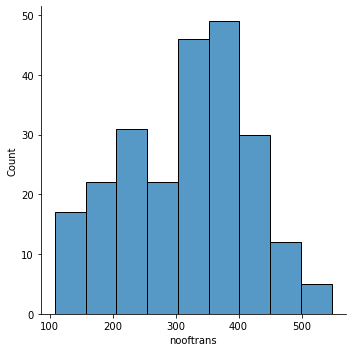

In [169]:
# plot shows the number of transactions happened.
figure = sns.displot(df['nooftrans'])
figure.savefig('nooftransaction.png')

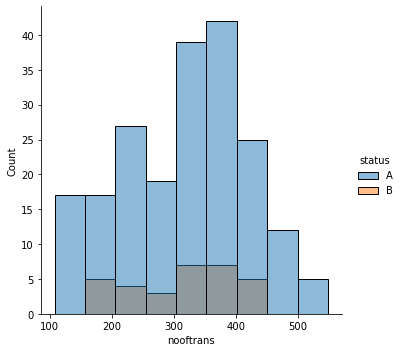

In [170]:
# number of transactions made by the status A and B meaning by good and bad customers
figure1 = sns.displot(df,x='nooftrans',hue='status')
figure1.savefig('withstatus.png')

<AxesSubplot:xlabel='loanamount', ylabel='status'>

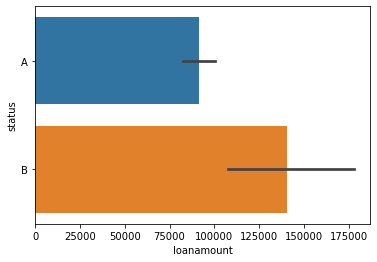

In [131]:
sns.barplot(x='loanamount', y ='status', data=df)

In [132]:
df['status'].value_counts()

A    203
B     31
Name: status, dtype: int64

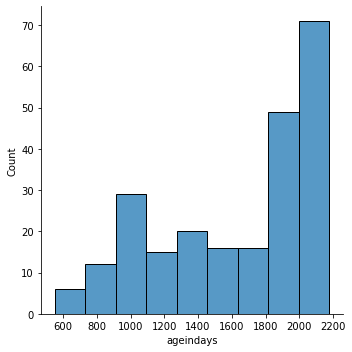

In [133]:
sns.displot(df['ageindays'])

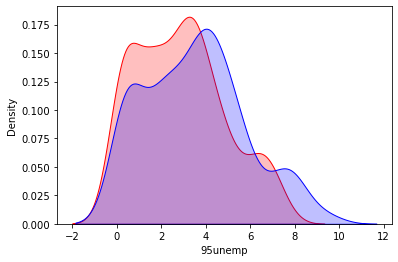

In [134]:
# plot represents the unemployment rate in the year 1995 and 1996
fig = sns.kdeplot(df['95unemp'], shade=True, color="r")
fig = sns.kdeplot(df['96unemp'], shade=True, color="b")
plt.show()


## Check for multicolinarity

In [135]:
# to find the correlation between two variable
correlation = df.corr()
correlation

,loan_id,nooftrans,ageindays,95unemp,96unemp,loanamount,birth_number,crime95,crime96,ratiopaid
loan_id,1.000000,0.108456,0.077547,-0.083545,-0.078858,0.082673,0.151662,0.144176,0.143709,0.120034
nooftrans,0.108456,1.000000,0.896726,-0.107024,-0.142902,0.200899,0.085988,0.061994,0.062902,0.353508
ageindays,0.077547,0.896726,1.000000,-0.159444,-0.194317,0.278373,0.065923,0.066678,0.067470,0.439152
95unemp,-0.083545,-0.107024,-0.159444,1.000000,0.953504,-0.012914,0.055640,-0.534407,-0.540018,-0.049599
96unemp,-0.078858,-0.142902,-0.194317,0.953504,1.000000,-0.009944,0.041388,-0.568564,-0.572576,-0.050709
loanamount,0.082673,0.200899,0.278373,-0.012914,-0.009944,1.000000,0.008705,-0.007111,-0.005546,0.596621
birth_number,0.151662,0.085988,0.065923,0.055640,0.041388,0.008705,1.000000,-0.019644,-0.019462,0.034583
crime95,0.144176,0.061994,0.066678,-0.534407,-0.568564,-0.007111,-0.019644,1.000000,0.999728,0.018829
crime96,0.143709,0.062902,0.067470,-0.540018,-0.572576,-0.005546,-0.019462,0.999728,1.000000,0.020247
ratiopaid,0.120034,0.353508,0.439152,-0.049599,-0.050709,0.596621,0.034583,0.018829,0.020247,1.000000


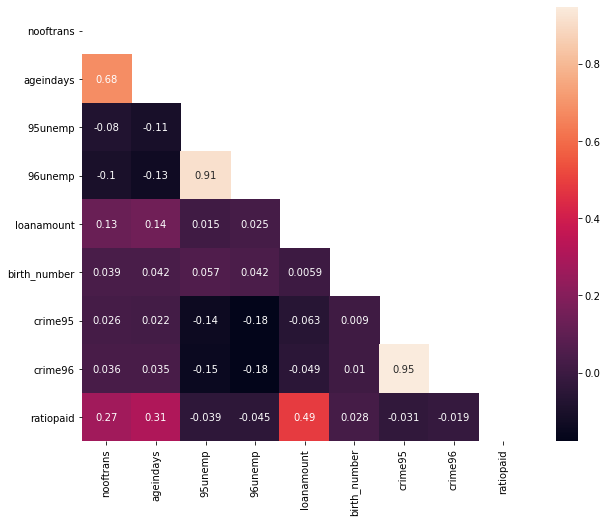

<Figure size 432x288 with 0 Axes>

In [174]:
# correlation plot
corr_matrix = df.corr(method='kendall')
fig, ax=plt.subplots(figsize=(10,8))
mask = np.triu(np.ones_like(corr_matrix,dtype=bool))
ax = sns.heatmap(corr_matrix,mask=mask,annot=True)
plt.show()
plt.savefig('correlation_heatmap.png')

## Clean and Wrangling steps

In [ ]:
# clean / wrangling steps suggested:
# bucket 
# change unemployment in to HML
#Change crime numbers into one

In [137]:
# having the loan_id and type in the data set doesnt make sense, so dropping it here
df.drop(['loan_id','type'],axis=1,inplace=True)

In [138]:
df.head()

,status,nooftrans,ageindays,95unemp,96unemp,loanamount,birth_number,crime95,crime96,ratiopaid
0,A,374,2134,0.29,0.43,80952,450204,85677,99107,0.96
1,B,259,1364,1.51,2.07,30276,395423,2299,2354,0.92
2,A,225,886,4.09,4.72,30276,620209,5623,5887,0.92
3,A,295,1534,1.12,1.54,165960,445613,1874,1913,0.96
4,A,209,970,4.75,5.44,102876,420128,18782,18347,0.92


# Preprocessing

In [ ]:
# split numerical and categorical data
#scale them
# clean /wrangling steps suggested :
# bucket into categories any fields 
# should we drop any columns ? (iterative process)
# extract gender from birth_number
# data type changes 
#drop highly correlated features 
#create avg of criminality / unempl rate 
# crime - divide by population 
# bring in any missing fields 
# change unempl into HML 
# change crime numbers into one column - sum the two columns 
#bring in the C and D statuses - and then using a function map to good or bad 
# OR multi class regression ?
# k symbol might be worth including 
# loan duration 

#feature engineering - take the columns and make more useful 


In [139]:
# extracting categorical data from the data set
df_cat= df.select_dtypes(include = object)

In [140]:
df_cat

,status
0,A
1,B
2,A
3,A
4,A
...,...
229,A
230,A
231,A
232,A


In [141]:
# seperating the numerical data from the data set
#this is the prediction X
x= df.select_dtypes(include = np.number)

In [142]:
x.head()

,nooftrans,ageindays,95unemp,96unemp,loanamount,birth_number,crime95,crime96,ratiopaid
0,374,2134,0.29,0.43,80952,450204,85677,99107,0.96
1,259,1364,1.51,2.07,30276,395423,2299,2354,0.92
2,225,886,4.09,4.72,30276,620209,5623,5887,0.92
3,295,1534,1.12,1.54,165960,445613,1874,1913,0.96
4,209,970,4.75,5.44,102876,420128,18782,18347,0.92


In [143]:
# getting the dummy values. 
categorical = pd.get_dummies(df_cat,columns=['status'],drop_first=True)
categorical.head()

,status_B
0,0
1,1
2,0
3,0
4,0


In [144]:
# numerical scaling
from sklearn.preprocessing import Normalizer

In [145]:
#scaling the umerical features normaliazed
#optional with logistics
# once we scale we convert the arrayback to a dataframe
scaler = Normalizer().fit(x)
scaled = scaler.transform(x)
scaled_x = pd.DataFrame(scaled)
scaled_x.head()

,0,1,2,3,4,5,6,7,8
0,0.000786,0.004485,6.094747e-07,9.037038e-07,0.170132,0.946165,0.180062,0.208287,0.000002
1,0.000653,0.003439,3.807397e-06,5.219411e-06,0.076340,0.997041,0.005797,0.005936,0.000002
2,0.000362,0.001427,6.586135e-06,7.600625e-06,0.048753,0.998724,0.009055,0.009480,0.000001
3,0.000620,0.003226,2.355295e-06,3.238531e-06,0.349004,0.937098,0.003941,0.004023,0.000002
4,0.000482,0.002238,1.096143e-05,1.255373e-05,0.237404,0.969517,0.043343,0.042339,0.000002


In [146]:
# if you had more than one categorical features than just the label(status) then we would concat
# X=np.concatenate(scaled_x,categorical,axis =1)

In [147]:
#independent variable categorical
y = categorical['status_B']
#independent variabke scaled_x
X=scaled_x

In [148]:
y

0      0
1      1
2      0
3      0
4      0
      ..
229    0
230    0
231    0
232    0
233    0
Name: status_B, Length: 234, dtype: uint8

In [149]:
X

,0,1,2,3,4,5,6,7,8
0,0.000786,0.004485,6.094747e-07,9.037038e-07,0.170132,0.946165,0.180062,0.208287,0.000002
1,0.000653,0.003439,3.807397e-06,5.219411e-06,0.076340,0.997041,0.005797,0.005936,0.000002
2,0.000362,0.001427,6.586135e-06,7.600625e-06,0.048753,0.998724,0.009055,0.009480,0.000001
3,0.000620,0.003226,2.355295e-06,3.238531e-06,0.349004,0.937098,0.003941,0.004023,0.000002
4,0.000482,0.002238,1.096143e-05,1.255373e-05,0.237404,0.969517,0.043343,0.042339,0.000002
...,...,...,...,...,...,...,...,...,...
229,0.000162,0.000885,3.729641e-07,5.530157e-07,0.057797,0.984008,0.110188,0.127460,0.000001
230,0.000258,0.001396,5.834141e-07,8.650623e-07,0.179611,0.947774,0.172363,0.199381,0.000002
231,0.000503,0.002974,4.275199e-06,4.917162e-06,0.072102,0.997386,0.002520,0.002566,0.000001
232,0.000444,0.002274,6.973720e-06,8.409486e-06,0.079149,0.996851,0.003094,0.003017,0.000001


## train test split, get LOG REG Free

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=40)


# apply model and train model

In [152]:
# classification score
# Logistic regression is all about accuracy
classification = LogisticRegression(solver = 'liblinear', multi_class = 'ovr').fit(X_train,y_train)

In [153]:
# add to the parameters as wished

## Evaluate accuracy the test

In [155]:
# gives the probability values according to the logistic regression curve
probabilities = classification.predict_proba(X_test)
probabilities

array([[0.8656403 , 0.1343597 ],
       [0.86218066, 0.13781934],
       [0.80932745, 0.19067255],
       [0.83869683, 0.16130317],
       [0.84589161, 0.15410839],
       [0.85698933, 0.14301067],
       [0.85851847, 0.14148153],
       [0.84488208, 0.15511792],
       [0.85623863, 0.14376137],
       [0.87857454, 0.12142546],
       [0.84453454, 0.15546546],
       [0.86373569, 0.13626431],
       [0.8515232 , 0.1484768 ],
       [0.85895129, 0.14104871],
       [0.8658463 , 0.1341537 ],
       [0.80816874, 0.19183126],
       [0.8510142 , 0.1489858 ],
       [0.86062557, 0.13937443],
       [0.83449   , 0.16551   ],
       [0.81680533, 0.18319467],
       [0.85985847, 0.14014153],
       [0.86402812, 0.13597188],
       [0.86162629, 0.13837371],
       [0.85752513, 0.14247487],
       [0.86681933, 0.13318067],
       [0.86395374, 0.13604626],
       [0.8588499 , 0.1411501 ],
       [0.85826728, 0.14173272],
       [0.86670861, 0.13329139],
       [0.86727011, 0.13272989],
       [0.

In [158]:
# the number below is the accuracy
preds = probabilities[:,1]
import sklearn.metrics as metrics                   
fpr,tpr, threshold = metrics.roc_curve(y_test,preds) # tpr- True positive rate
roc_auc = metrics.auc(fpr,tpr)                       # fpr - False positive rate
print (roc_auc)                                      # auc - Area under the curve, # roc - Receiver operationg characteristics

0.7817460317460317


## visualising accuracy-ROC/AUC

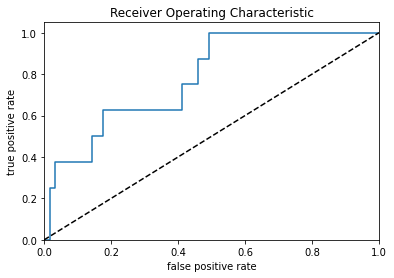

<Figure size 432x288 with 0 Axes>

In [173]:
#roc curve plot 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, label='AUC'%roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
plt.show()
plt.savefig('ROC.png')

## visualizing accuracy - confusion Matrix

In [160]:
from sklearn.metrics import accuracy_score

predictions =classification.predict(X_test)

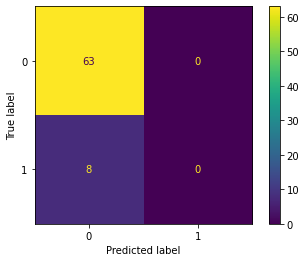

In [161]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 

accuracy_score(y_test,predictions)
confusion_matrix(y_test,predictions)
plot_confusion_matrix(classification,X_test, y_test)
plt.show()

The data is imbalanced. Though it gives good percentage of roc accuracy in calculation and in the graph, the confusion matrix gives
the bad result. Since, we are already familiar with the data, this result was expected one.